<a href="https://colab.research.google.com/github/simran-sai/Zeotap/blob/main/SaiSimran_Patro_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load processed data
data = pd.read_csv("Processed_Data.csv")


In [3]:
# Feature preparation for clustering
cluster_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'ProductID': 'nunique'
}).reset_index()
scaler = StandardScaler()
scaled_cluster_features = scaler.fit_transform(cluster_features.iloc[:, 1:])

In [4]:
# Determine the optimal number of clusters
db_scores = []
clusters_range = range(2, 11)
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_cluster_features)
    labels = kmeans.labels_
    db_scores.append(davies_bouldin_score(scaled_cluster_features, labels))

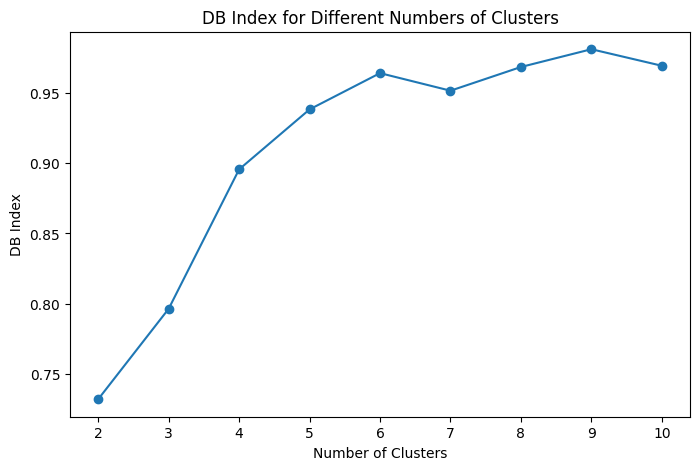

In [5]:
# Plot DB Index for each number of clusters
plt.figure(figsize=(8, 5))
plt.plot(clusters_range, db_scores, marker='o')
plt.title('DB Index for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.savefig("db_index_plot.pdf")
plt.show()

In [6]:
# Perform clustering with optimal number of clusters
optimal_clusters = clusters_range[db_scores.index(min(db_scores))]
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_cluster_features)


In [7]:
# Add cluster labels to the dataset
cluster_features['Cluster'] = cluster_labels

# Save results
cluster_features.to_csv("Clustering_Results.csv", index=False)


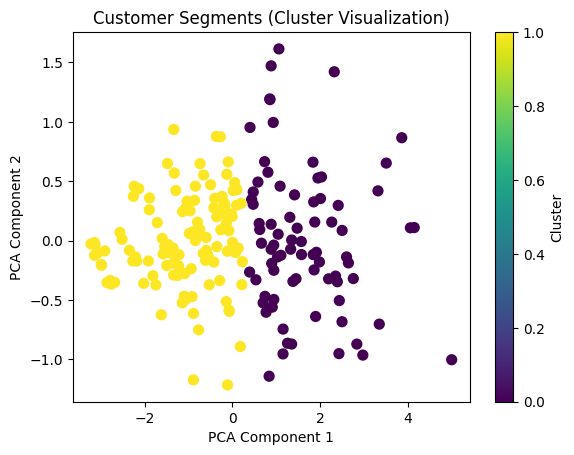

In [8]:
# Visualize clusters (PCA for dimensionality reduction)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_cluster_features)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('Customer Segments (Cluster Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.savefig("cluster_visualization.pdf")
plt.show()

In [9]:
print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"DB Index: {min(db_scores)}")

Optimal Number of Clusters: 2
DB Index: 0.7317917074274123
